# Prac 07.2

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

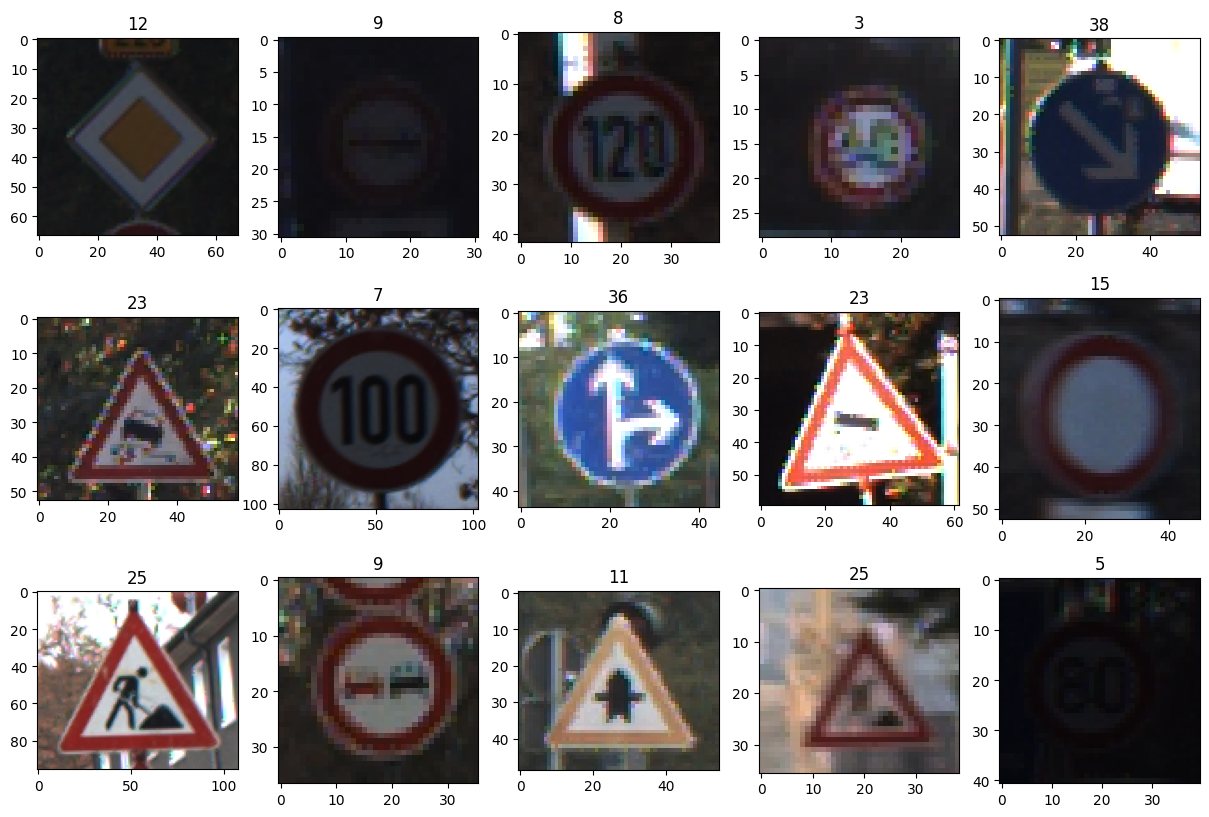

In [5]:
# Load the training labels
root = 'C:\labsCV\lab7\GTSRB' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [6]:
# Extract class identifiers
# Hint: Check the csv
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

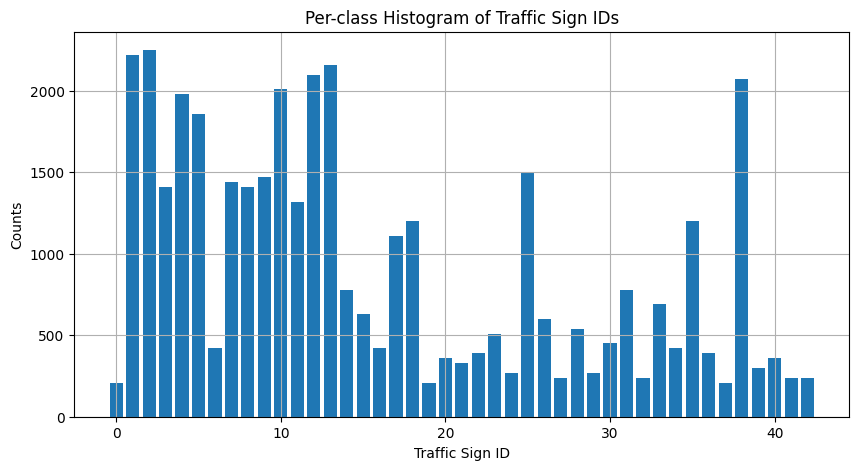

In [7]:
from collections import Counter
hist = Counter(ids)

plt.figure(figsize=(10, 5))
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
plt.title('Per-class Histogram of Traffic Sign IDs')
plt.show()

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why? The GTSRB dataset is not entirely balanced, as the distribution of samples across classes varies. Some classes have significantly more images than others, which affects model training since more frequent classes provide more learning opportunities.
* Are there any classes that are (significantly) over-represented or under-represeneted?
Over-Represented Classes: Certain common traffic signs, such as speed limits or "Stop" signs, are usually over-represented. 
Under-Represented Classes: Less common signs, such as rare warnings or unusual traffic directives, may have fewer images, making them under-represented.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

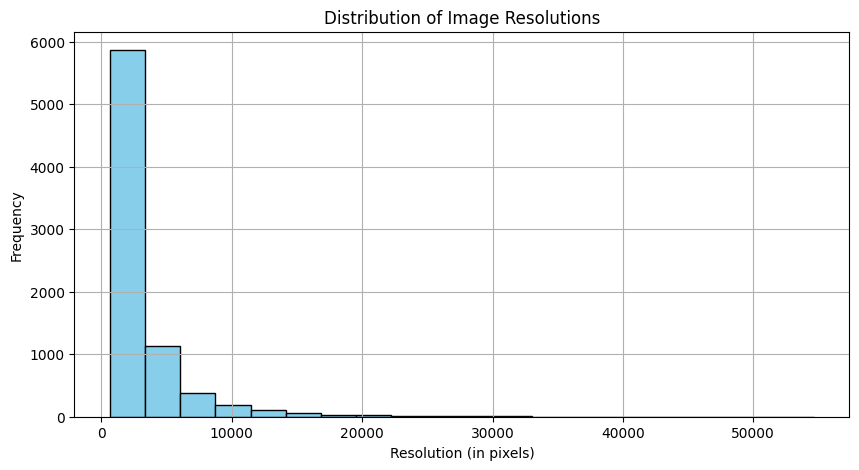

In [15]:
sample_data = data.sample(frac=0.2, random_state=42)

resolutions = []
for _, row in sample_data.iterrows():
    img_path = os.path.join(root, row['Path'])
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    resolutions.append((w, h))

resolution_sizes = [w * h for w, h in resolutions]

plt.figure(figsize=(10, 5))
plt.hist(resolution_sizes, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Resolution (in pixels)')
plt.ylabel('Frequency')
plt.title('Distribution of Image Resolutions')
plt.grid(True)
plt.show()


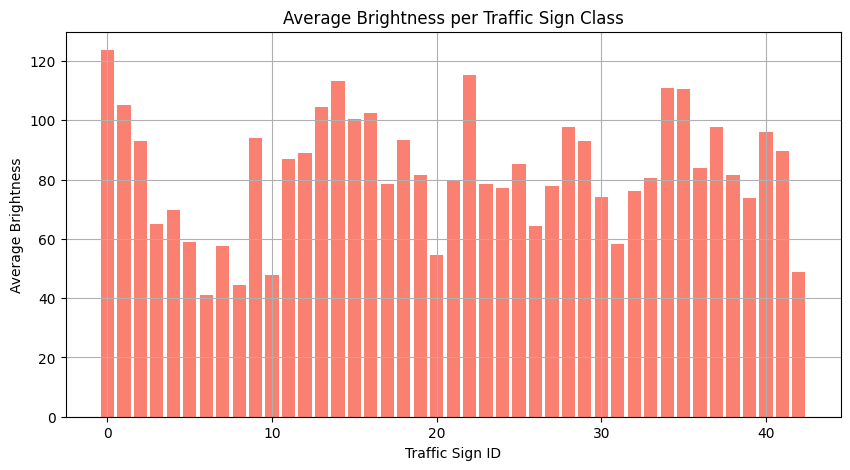

In [18]:
brightness_by_class = {}
for _, row in sample_data.iterrows():
    img_path = os.path.join(root, row['Path'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for brightness
    avg_brightness = img.mean()
    class_id = row['ClassId']
    
    if class_id not in brightness_by_class:
        brightness_by_class[class_id] = []
    brightness_by_class[class_id].append(avg_brightness)

# Calculate the average brightness per class
avg_brightness_per_class = {class_id: np.mean(brightness) for class_id, brightness in brightness_by_class.items()}

# Plot brightness distribution
plt.figure(figsize=(10, 5))
plt.bar(avg_brightness_per_class.keys(), avg_brightness_per_class.values(), color='salmon')
plt.xlabel('Traffic Sign ID'), plt.ylabel('Average Brightness')
plt.title('Average Brightness per Traffic Sign Class')
plt.grid(True)
plt.show()
